## Comparisons of states
Since state effect seems so dominant across counties, and also seems to cluster nearby states together, I first tried to do a decomposition of the $G_{s,d}$ matrix: 51 rows (states), 1103 columns (generic drugs).  

I decomposed $G_{s,d} = U \cdot \Sigma \cdot V^T$ and then examined the transformed states ($U \cdot \Sigma$) and the eigenvectors for the drugs ($V^T$)

The transformed states ($U \cdot \Sigma $) are below, where "k = 0... k = 2" denotes the top eigendimensions: 

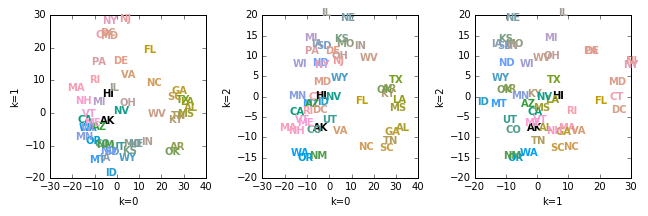

In [1]:
from IPython.display import Image 

## Fig 1
Image(filename='png/svdtop3.png',width=800)

So, these unsupervised dimensions definitely appear to correlate with known characterisitics of different states. Correlating this with demographic info for the states (below), it seems:

- First dimension is southern, black, poor VS northern, rich
- Second dimension is (north)eastern, urban VS western (southwestern)
- Third dimension does not strongly correlate with my variables, but mostly white states

These demographic variables are all highly correlated with each other which led to the canonical correlation analysis of states and counties in the next section.

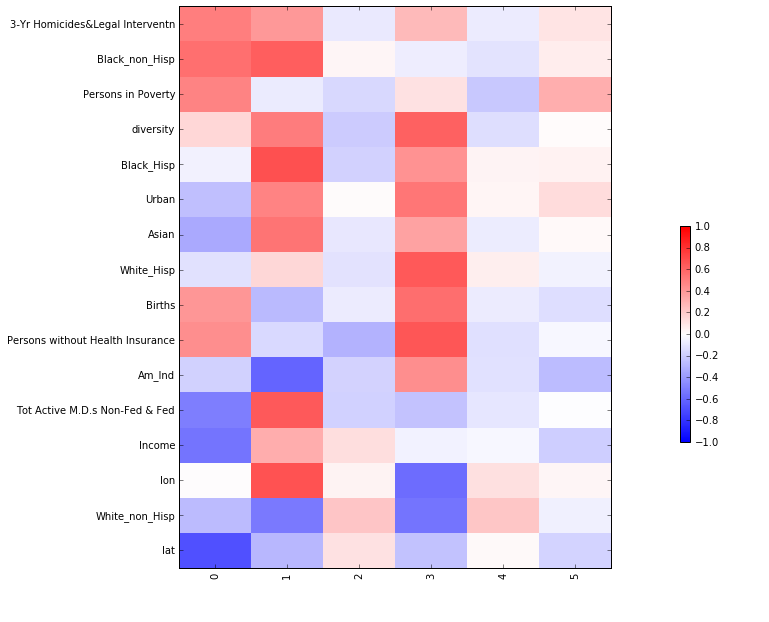

In [4]:
## Fig 2
Image(filename='png/svd_demo.png',width=600)

I also wanted to use the $V^T$ matrix of eigenvectors to compare drugs to each other in the projected space.  However, I don't have a lot of variables on which to compare drugs to each other, and they are mostly categorical variables (with many categories) rather than continuous. 

The variables are drug therapeutic classes, from Redbook.  A generic drug could belong to more than one therapeutic class especially since classes can be very similar. In order to get a better idea of the systematic changes in drug use across states I partitioned drugs into non-overlapping partitions by combining the classes. This is a bit arbitrary. Then, I looked at the mean value of the drugs in the class for each of the top eigenvectors (columns). Again going through the first few dimensions:
- First dimension: higher levels drugs related to cardiovascular disease. The opposite end of this dimension are northern states associated with psychiatric and antineoplastic.
- Second dimension: associated with more antiinflammatory drugs, less psychiatric drugs and estrogens.
- Third dimension: particularly antihyperlipidemic and antidepressants.

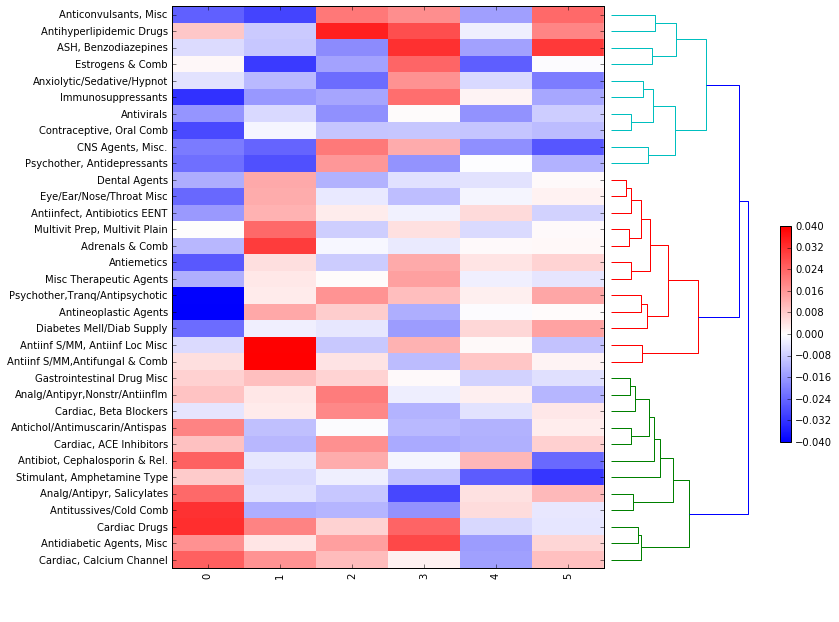

In [8]:
## Fig 3 
Image(filename='png/svd_partitions.png',width=600)

### How current are drugs?
I created a relative measure of how recent each drug is by comparing its start date to other drugs in the same class or same partition.  I used the value:  $recent_d = (date_d - \bar{date}_{class\ of\ d})/var(dates)$. This created a vector $recent$. 

Then I transformed this $recent' = recent^T \cdot V $ to get the score of the top 6 dimensions for this vector.  It seems like dimensions 1, 5, and 0 are the most strongly related to this characteristic. 

In [15]:
(recent, U, Sigma, VT) = pickle.load(open('recent.pkl'))
pd.DataFrame(recent.dot(VT.transpose()),index=range(6))

,0
0,2.034571
1,3.418538
2,0.890201
3,0.988435
4,-0.659477
5,-2.175787


Then  I transformed the vector to the space of states, and compared it to the score of each state in the dimensions (similar to the correlations in Fig. 2), using the transformation: $ R = recent^T \cdot V \cdot \Sigma^{-1} \cdot U^T $.  This is my approximation of how the recent-ness of drug use relates to the other sources of variation of drug use across states. Below, I see how this variable compares some of the top dimensions of variation.  It is positively correlated with dimensions 0, 1, and anticorrelated with 5.  

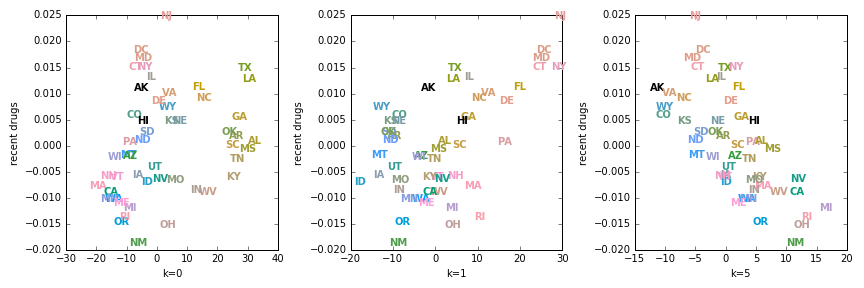

In [18]:
## Fig 4
Image(filename='png/recent_drug_k.png',width=800)

## Canonical correlation analysis
I still think I'm missing an aspect of what factors are behind the variation across the country. In particular, what is dimension 5 above? So I aggregated more info about states and counties together. As before, these are very correlated with each other across geographic units (below, scale is pearson correlation across 3188 counties and states).

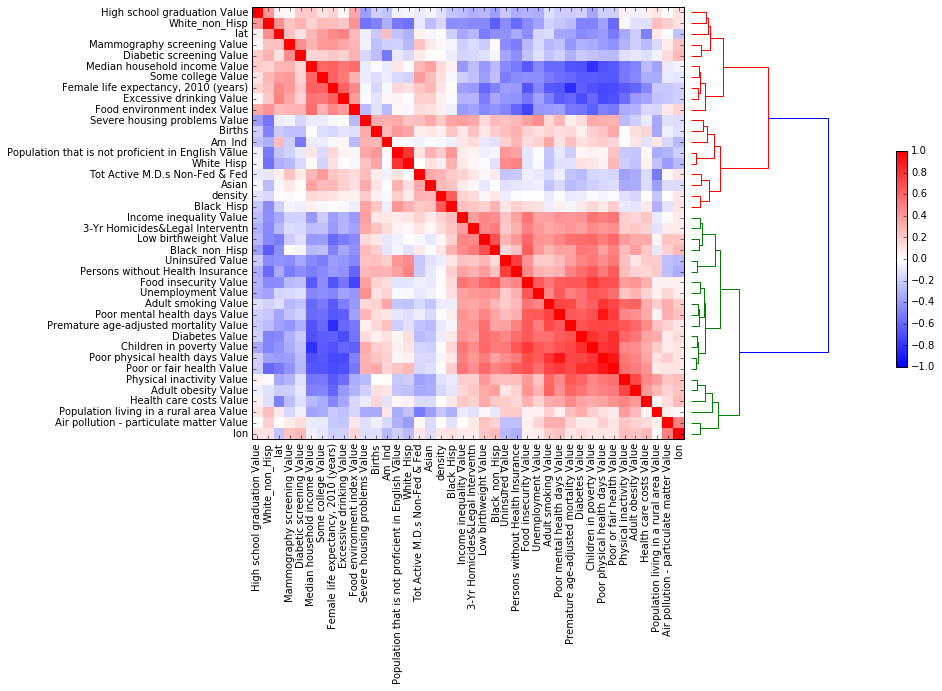

In [20]:
## Fig 5
Image(filename='png/health_demo_cty.png',width=900)

Then I did canonical correlation analysis.  This finds the directions of covariance between the matrices $G_{c,d}$, for 3188 places and 1103 drugs, and $H_{c,v}$ for 3188 places and 34 variables of the ones above. One way to test the significance of the dimensions is Wilks Lambda, below, which tells us the first 20ish dimensions are significant.  Out of 34?  I'm not sure.

In [21]:
pd.read_table('wilksl.txt',sep='\t')

,WilksL,F,df1,df2,p
1,4.825234e-14,2.728821,37502,69846.100626,0.000000e+00
2,6.291047e-13,2.505545,36366,67810.629106,0.000000e+00
3,6.549603e-12,2.309084,35232,65773.958029,0.000000e+00
4,5.116384e-11,2.146328,34100,63736.092712,0.000000e+00
5,3.143511e-10,2.010334,32970,61697.038516,0.000000e+00
6,1.427285e-09,1.909003,31842,59656.800843,0.000000e+00
7,5.820968e-09,1.817229,30716,57615.385143,0.000000e+00
8,2.107982e-08,1.736754,29592,55572.796904,0.000000e+00
9,6.874631e-08,1.666060,28470,53529.041662,0.000000e+00
10,2.163826e-07,1.595955,27350,51484.124996,0.000000e+00


So now we can make the same state by state comaprisons, but, the dimensions have been found using all counties and states, and the interpretation should be in terms of both drug variation and demographic variation.  As you can see, the top dimensions look somewhat similar to the SVD/pca dimensions.  But now the interpretation in the demographic dimensions should be clearer.

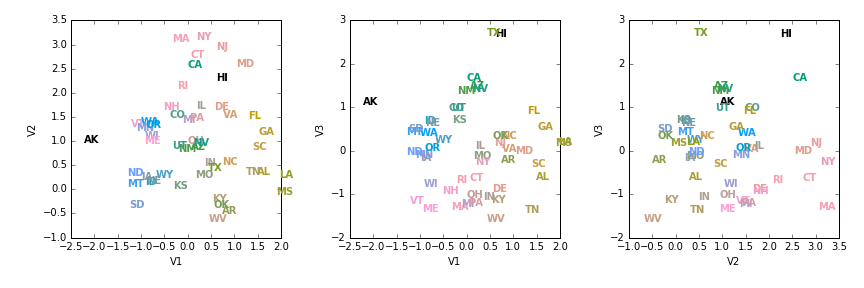

In [26]:
## Fig 6
Image(filename='png/ccaTop3.png',width=800)

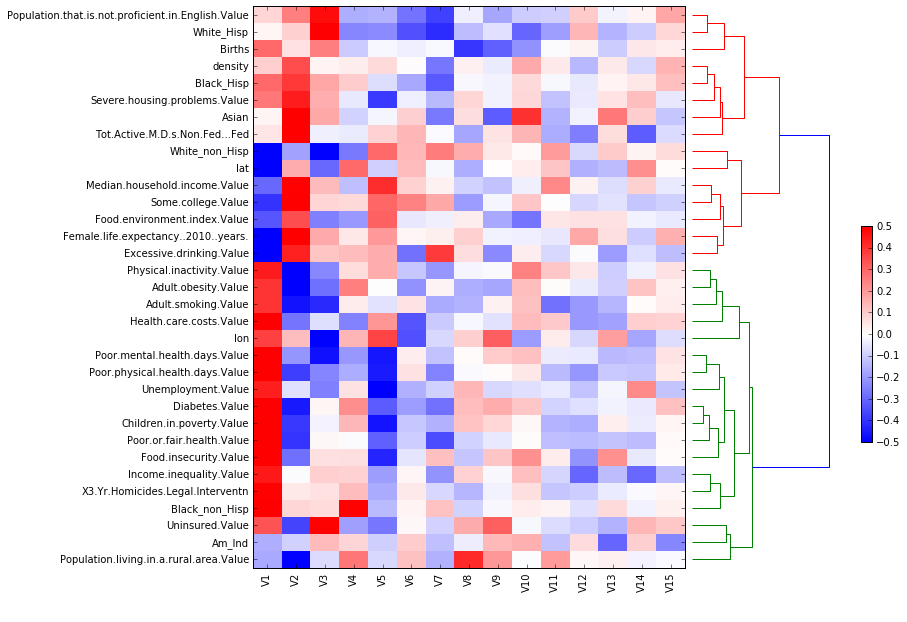

In [27]:
## Fig 7
Image(filename='png/canonical_dim_correlations.png',width=800)

To do:

- Do counties have greater drug-covariance similarity to their state than would be expected just due to demographic similarities? 
- Project the "recentness" vector to the canonical dimensions and test the hypothesis the more rural places with fewer doctors have older drugs.
- Can we predict life expectancy or overall health, removing these variables from the demographics?  Everything is very correlated.